# When Can I Swim in the Gulf of Alaska?
### A very short lesson in Python's pandas library

### Python Data Analysis Library

> Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

I want to go swimming - but during an NGA LTER cruise in the Gulf of Alaska. I don't trust my own senses or judgement, but will be ruled by the numbers. I will ask these questions:

* According to historical data, what month has the warmest temperatures?
* When was the maximum temperature recorded?

In [13]:
# First import pandas so Python knows about its classes and functions
# `pd` is a common abbreviation for this library
import pandas as pd

# This is to ensure plots show up
%matplotlib inline

## Create a Dataframe

The `DataFrame` is the way Pandas represents a table. Technically, `DataFrame` is a class with lots of associated methods. What that means is when you read data into a `DataFrame`, it looks like a spreadsheet that you can manipulate easily.

You can read a DataFrame in from a CSV, even it is posted on the web somewhere. Here, one of NGA LTER's signature datasets is read into a `DataFrame`. The data is Dr. Seth Danielson's [GAK1 Temperature and Salinity Time Series](https://nga.lternet.edu/data-overview/signature-datasets/). It is available and described on the NGA LTER website.

Note that this dataset is "tidy", which enables pandas to read it. "Tidy" means:

* Only rows and columns, no additional structure
* One column for each type of information
* One row for each observation (i.e., data point)



In [14]:
# define the URL of the data
filename = 'https://nga.lternet.edu/wp-content/uploads/2021/06/GAK1_SignatureDataSet.csv'

# read the data
# It is comma delimited, but there are spaces in front of each comma that we
# want to ignore.
data = pd.read_csv(filename, skipinitialspace=True)

# what does it look like?
data.head()

,Year,Month,0-50m Temperature (deg.C),150-200m Temperature (deg.C),0-50m Salinity,150-200m Salinity,0-50m Temperature Anomaly (deg.C),150-200m Temperature Anomaly (deg.C),0-50m Salinity Anomaly,150-200m Salinity Anomaly
0,1970,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## What is that?

The website describes the following columns:

Data Column Contents:    

1. Year  
2. Month
3. Surface Temperature (degrees Celsius)
4. Deep Temperature (degrees Celsius)
5. Surface Salinity (nondimensional)
6. Deep Salinity (nondimensional)
7. Surface Temperature Anomaly (degrees Celsius)
8. Deep Temperature Anomaly (degrees Celsius)  
9. Surface Salinity Anomaly (nondimensional)
10. Deep Salinity Anomaly (nondimensional)
11. Depth Layer definitions:

Where:

* Surface: 0 – 50 m
* Deep: 150 – 200 m

This is "Metadata" or data about data, and is important to understanding the data. From the metadata, I see that I should base my decision on Surface Temperature in degrees Celsius.

One thing the metadata doesn't say is that `NaN` means that no data was collected during that month. The method `head()` only shows the first few rows where there isn't yet data. We can use `describe()` to give an overview of the data.

In [15]:
data.describe()

,Year,Month,0-50m Temperature (deg.C),150-200m Temperature (deg.C),0-50m Salinity,150-200m Salinity,0-50m Temperature Anomaly (deg.C),150-200m Temperature Anomaly (deg.C),0-50m Salinity Anomaly,150-200m Salinity Anomaly
count,624.000000,624.000000,437.000000,435.000000,437.000000,435.000000,437.000000,435.000000,437.000000,435.000000
mean,1995.500000,6.500000,7.318886,5.755129,30.418137,32.509759,0.001140,-0.000005,-0.004380,0.000016
std,15.020371,3.454822,2.788359,0.818272,0.981993,0.343975,0.862792,0.630108,0.422792,0.211970
min,1970.000000,1.000000,1.758000,2.130000,26.597000,31.536000,-3.126000,-3.142000,-2.656000,-0.736000
25%,1982.750000,3.750000,4.929000,5.285500,29.739000,32.261000,-0.523000,-0.397000,-0.241000,-0.145000
50%,1995.500000,6.500000,6.854000,5.778000,30.724000,32.539000,-0.010000,0.037000,0.023000,-0.004000
75%,2008.250000,9.250000,9.889000,6.315000,31.179000,32.778000,0.543000,0.365000,0.247000,0.125500
max,2021.000000,12.000000,13.239000,7.903000,31.998000,33.224000,2.423000,1.763000,1.599000,0.702000


## Advantages of pandas

My first objective is to find the warmest month. We could do this with basic Python control commands - looping through the months with `for` and collecting data for certain months with `if`.

However, pandas wraps that concept in a single command. Therefore, it is much easier to perform data exploration with pandas than with elementary Python.

In [16]:
# What month would be warmest?  Make a climatology by grouping measurements
# made in the same month, and then taking the mean of each group.

# We can "chain" commands together to avoid defining an intermediate variable.
climatology = data.groupby('Month').mean()


## Climatology

There are 12 rows in my new climatology `DataFrame` - one for each month. The columns are the same as before. Each cell is the mean of all the values in the month.

All the methods that worked with our first `DataFrame`, data, will also work with this one.

In [17]:
climatology.head()

,Year,0-50m Temperature (deg.C),150-200m Temperature (deg.C),0-50m Salinity,150-200m Salinity,0-50m Temperature Anomaly (deg.C),150-200m Temperature Anomaly (deg.C),0-50m Salinity Anomaly,150-200m Salinity Anomaly
Month,,,,,,,,,
1,1995.5,5.061346,6.473077,30.864038,32.182500,0.016346,5.871372e-18,-0.004077,0.000077
2,1995.5,4.389844,5.704344,31.157719,32.052813,0.019281,3.125000e-05,-0.014500,-0.000031
3,1995.5,3.923026,5.272184,31.301000,32.182684,0.003474,-2.631579e-05,0.000447,-0.000026
4,1995.5,4.338439,5.069707,31.381073,32.267805,0.003195,-2.439024e-05,0.001659,0.000024
5,1995.5,5.742000,5.374590,31.266974,32.435333,-0.000846,-5.128205e-05,0.003026,0.000026


In [18]:
climatology.describe()

,Year,0-50m Temperature (deg.C),150-200m Temperature (deg.C),0-50m Salinity,150-200m Salinity,0-50m Temperature Anomaly (deg.C),150-200m Temperature Anomaly (deg.C),0-50m Salinity Anomaly,150-200m Salinity Anomaly
count,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,1.200000e+01,12.000000,12.000000
mean,1995.5,7.290497,5.780855,30.416319,32.502578,0.001839,-5.398994e-06,-0.004740,0.000017
std,0.0,2.783246,0.544361,0.898149,0.291053,0.019244,5.501139e-05,0.009020,0.000040
min,1995.5,3.923026,5.069707,28.921054,32.052813,-0.038463,-1.081081e-04,-0.020757,-0.000031
25%,1995.5,4.893471,5.395429,29.659397,32.246525,-0.002003,-3.255735e-05,-0.011184,-0.000025
50%,1995.5,6.833792,5.670168,30.663703,32.510106,0.003334,1.944415e-18,-0.003402,0.000025
75%,1995.5,9.845726,6.032850,31.185033,32.783548,0.017080,2.864583e-05,0.000750,0.000037
max,1995.5,11.480000,6.794200,31.381073,32.902938,0.026081,1.000000e-04,0.011293,0.000079


## Make a plot



In [19]:
# I guess that DataFrames have a `plot` method. To find out more ...

climatology.plot?

<Axes: title={'center': 'Climatology of GAK1 Surface Temperature'}, xlabel='Month', ylabel='degree C'>

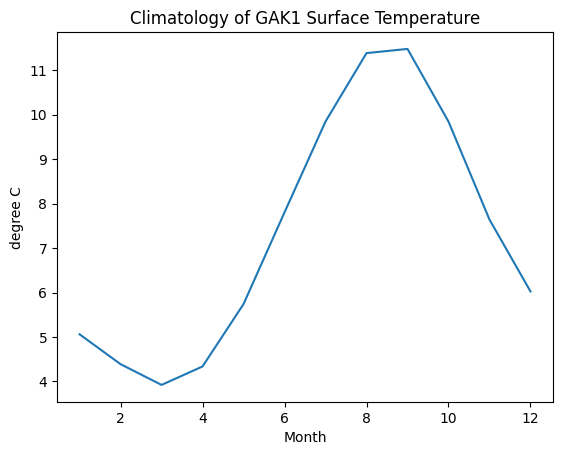

In [20]:
# Plot just the column that I am interested in
# Use arguments to add elements to the plot

temp_c = climatology['0-50m Temperature (deg.C)']
temp_c.plot(
    title='Climatology of GAK1 Surface Temperature',
    ylabel='degree C'
)

<Axes: title={'center': 'Climatology of GAK1 Surface Temperature'}, xlabel='Month', ylabel='degree F'>

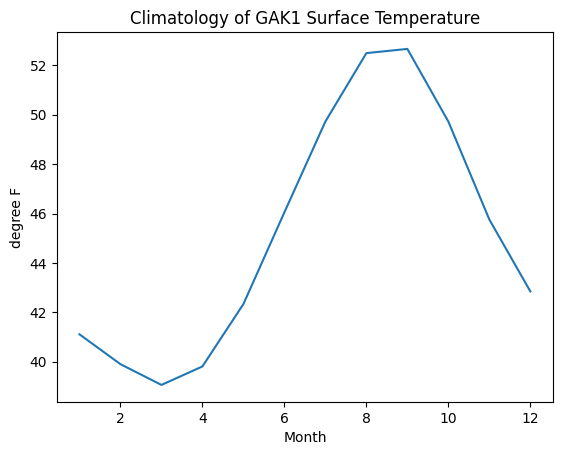

In [21]:
# That looks promising. It is warmer in late summer.
# But I'm more familiar with degrees Fahrenheit.
# Luckily, we can do math in pandas too.

# Convert the units of temperature
temp_f = climatology['0-50m Temperature (deg.C)'] * 9/5 + 32

temp_f.plot(
    title='Climatology of GAK1 Surface Temperature',
    ylabel='degree F'
)

## On what date was the maximum?

52 F is too cold for me to swim. But I am still hopeful. Maybe I can look at the maximum instead.



In [22]:
# What is the maximum temperature at the surface?

temp_max = data['0-50m Temperature (deg.C)'].max()
temp_max

13.239

In [23]:
# When was the maximum?
# For this, we can subset the original dataset according to a criteria

data.loc[data['0-50m Temperature (deg.C)'] == temp_max]

,Year,Month,0-50m Temperature (deg.C),150-200m Temperature (deg.C),0-50m Salinity,150-200m Salinity,0-50m Temperature Anomaly (deg.C),150-200m Temperature Anomaly (deg.C),0-50m Salinity Anomaly,150-200m Salinity Anomaly
536,2014,9,13.239,5.778,29.071,32.756,1.704,0.121,0.109,-0.09


In [24]:
# And what is that in F?

temp_max * 9/5 + 32

55.830200000000005

### Nope. That is still too cold.

# Exploration Finished